# Converting SynthDet labels to yolo

Project structure with labels

In [ ]:
!cd Info && ls

Loading json with the labels

In [44]:
import json

path_to_labels = 'Info/captures_00'
number_files = 7 # TODO: MODIFY IF NUMBER OF FILES IS BIGGER
jsons = []
for file_number in range(number_files):
    file = open(path_to_labels+str(file_number)+".json", 'r')
    j = json.load(file)
    jsons.append(j)

> Yolo Format folows this pattern, we convert the json to fit the requeriments

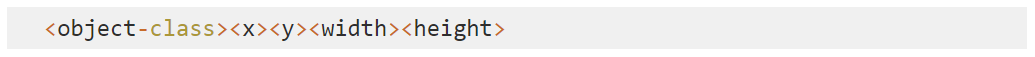

In [62]:
file_annot = {}
for j in range(len(jsons)): #Iterating over files
    for label in jsons[j]['captures']: #Iterating over captures of the files
        file = label['filename'].split('/')[1]
        file_annot[file] = [] #Creating new records for the file
        for annot in label['annotations'][0]['values']: #Iterating  over annot in captures
            yolo_fmt =  [str(annot['label_id']), str(annot['x']), str(annot['y']), str(annot['width']), str(annot['height'])]
            file_annot[file].append(yolo_fmt)

In [63]:
print(file_annot['rgb_1001.png'])

[['1', '1315.0', '30.0', '150.0', '77.0'], ['1', '1041.0', '82.0', '215.0', '108.0'], ['1', '671.0', '132.0', '214.0', '110.0'], ['1', '1412.0', '271.0', '213.0', '86.0'], ['1', '1216.0', '317.0', '136.0', '69.0'], ['1', '413.0', '396.0', '118.0', '65.0'], ['1', '914.0', '423.0', '155.0', '78.0'], ['1', '1195.0', '587.0', '222.0', '121.0'], ['1', '1069.0', '676.0', '193.0', '99.0'], ['1', '662.0', '795.0', '179.0', '72.0'], ['1', '349.0', '810.0', '162.0', '89.0'], ['1', '1327.0', '866.0', '239.0', '95.0'], ['1', '842.0', '889.0', '280.0', '113.0'], ['1', '1070.0', '1008.0', '273.0', '72.0'], ['1', '491.0', '1040.0', '176.0', '40.0']]


Writing  the logs to file 

In [68]:
import pandas as pd
from pathlib import Path

for key, val in file_annot.items():
    df = pd.DataFrame(val)
    path_out = Path('Labels/'+key.split('.')[0]+'.txt')
    df.to_csv(path_out, header=False, index=False, sep=' ')